Banco de dados Escolhidos B3 Stocks 1994 at√© 2020

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("b3_stocks_1994_2020.csv")



2. Etapas obrigat√≥rias que dever√£o realizar:
2.1. Explora√ß√£o Inicial dos Dados:
o Descrever as vari√°veis presentes.
o Verificar se h√° dados ausentes ou valores discrepantes (outliers).

In [3]:
# Verificar o tipo de cada vari√°vel e estat√≠sticas b√°sicas
data_types = df.dtypes

# Verificar valores ausentes
missing_values = df.isnull().sum()

# Estat√≠sticas descritivas para identificar poss√≠veis outliers
descriptive_stats = df.describe()

data_types, missing_values, descriptive_stats


(datetime     object
 ticker       object
 open        float64
 close       float64
 high        float64
 low         float64
 volume      float64
 dtype: object,
 datetime    0
 ticker      0
 open        0
 close       0
 high        0
 low         0
 volume      0
 dtype: int64,
                open         close          high           low        volume
 count  1.883203e+06  1.883203e+06  1.883203e+06  1.883203e+06  1.883203e+06
 mean   6.814208e+01  6.827674e+01  6.882414e+01  6.754027e+01  1.668286e+07
 std    1.689781e+03  1.695070e+03  1.699966e+03  1.683604e+03  1.026344e+08
 min    1.000000e-02  0.000000e+00  1.000000e-02  1.000000e-02  0.000000e+00
 25%    3.960000e+00  3.960000e+00  4.000000e+00  3.890000e+00  1.800500e+04
 50%    1.369000e+01  1.370000e+01  1.392000e+01  1.345000e+01  2.526560e+05
 75%    3.670000e+01  3.673000e+01  3.714000e+01  3.608000e+01  4.794014e+06
 max    1.297776e+06  1.297776e+06  1.297776e+06  1.297776e+06  4.298380e+10)

N√£o h√° valores ausentes em nenhuma coluna:

datetime    0
ticker      0
open        0
close       0
high        0
low         0
volume      0

Convers√£o e visualiza√ß√£o dos dados de data;

An√°lise dos outliers com gr√°ficos (ex: boxplot, histograma);

Filtrar registros com pre√ßos ou volume igual a 0.

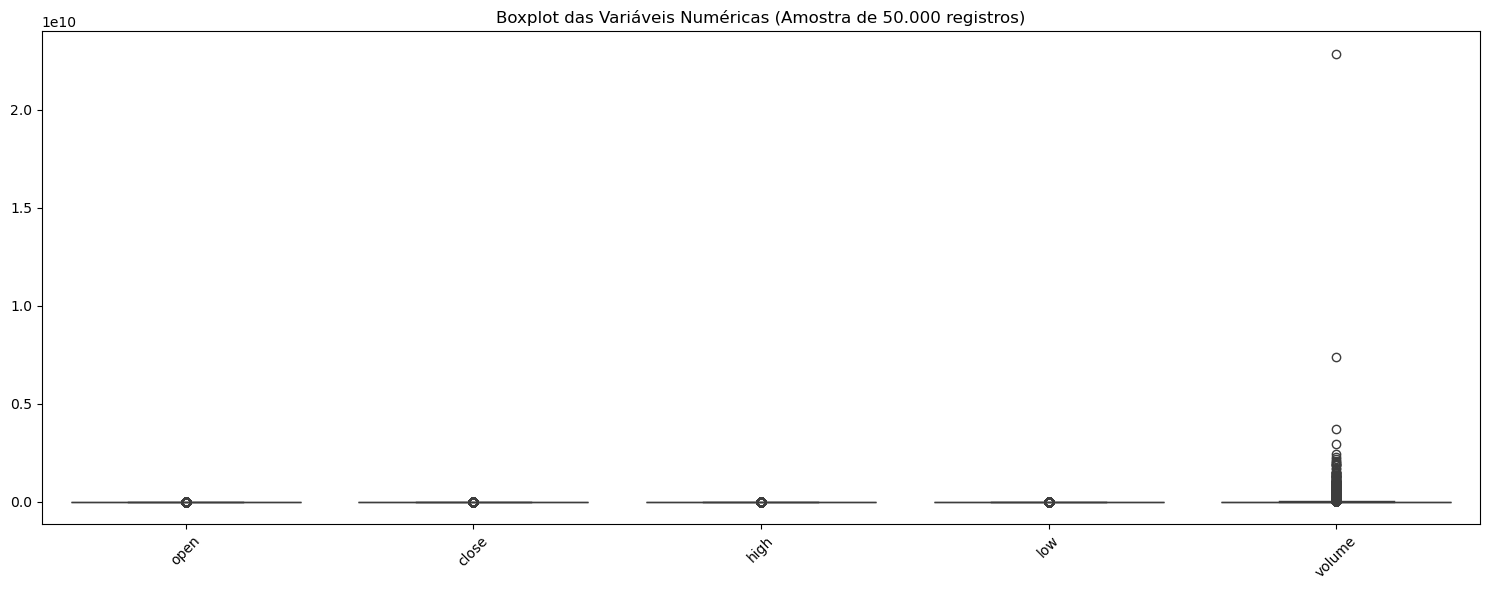

(None,
          datetime  ticker  open  close  high   low    volume
 333983 2000-08-25   PIUM4  9.60    9.6  9.60  9.60      0.00
 361562 2000-08-25   PIUM3  9.60    9.6  9.60  9.60      0.00
 574546 2005-01-28  TLVT3B  0.43    0.0  0.43  0.43  20891.12
 587315 2005-04-20  ENMA5B  0.23    0.0  0.23  0.23   1120.79
 587316 2005-04-20  ENMA6B  0.23    0.0  0.23  0.23   1470.39)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Converter datetime para tipo datetime
df['datetime'] = pd.to_datetime(df['datetime'])

# Filtrar apenas registros com valores iguais a zero (potenciais dados inv√°lidos)
zero_values = df[(df[['open', 'close', 'high', 'low', 'volume']] == 0).any(axis=1)]

# Criar boxplots para identificar outliers nas vari√°veis num√©ricas (usando amostra para desempenho)
sample_df = df.sample(n=50000, random_state=42)

# Plot
plt.figure(figsize=(15, 6))
sns.boxplot(data=sample_df[['open', 'close', 'high', 'low', 'volume']])
plt.title("Boxplot das Vari√°veis Num√©ricas (Amostra de 50.000 registros)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show(), zero_values.head()


In [5]:
# Remover registros com volume = 0 ou close = 0
df_clean = df[(df['close'] > 0) & (df['volume'] > 0)]

# Verificar quantos registros foram removidos
removed_count = len(df) - len(df_clean)

# Mostrar nova forma dos dados limpos
print("Registros ap√≥s limpeza:", df_clean.shape)
print("Registros removidos:", removed_count)


Registros ap√≥s limpeza: (1883197, 7)
Registros removidos: 6


In [6]:
# Renomeando o DataFrame filtrado
df_clean = df[(df['close'] > 0) & (df['volume'] > 0)]


In [7]:
df = df[(df['close'] > 0) & (df['volume'] > 0)]


2.2. Resumo Estat√≠stico:
o Calcular medidas como m√©dia, mediana, moda, m√≠nimo, m√°ximo, quartis e
desvio padr√£o para vari√°veis num√©ricas.

In [8]:
import pandas as pd

# Selecionar colunas num√©ricas
numeric_cols = ['open', 'close', 'high', 'low', 'volume']

# Resumo estat√≠stico: m√©dia, mediana, min, max, std, quartis
summary = df_clean[numeric_cols].describe().T

# Adicionar a moda
summary['mode'] = df_clean[numeric_cols].mode().iloc[0]

# Mostrar a tabela
summary


count          mean           std   min       25%        50%  \
open    1883197.0  6.814229e+01  1.689783e+03  0.01      3.96      13.69   
close   1883197.0  6.827695e+01  1.695073e+03  0.01      3.96      13.70   
high    1883197.0  6.882435e+01  1.699969e+03  0.01      4.00      13.92   
low     1883197.0  6.754047e+01  1.683607e+03  0.01      3.89      13.45   
volume  1883197.0  1.668291e+07  1.026346e+08  0.02  18005.00  252657.00   

               75%           max    mode  
open         36.70  1.297776e+06     6.0  
close        36.73  1.297776e+06     6.0  
high         37.14  1.297776e+06    10.0  
low          36.08  1.297776e+06     5.0  
volume  4794073.00  4.298380e+10  3000.0

 1. M√©dia

In [9]:
df_clean[['open', 'close', 'high', 'low', 'volume']].mean()


open      6.814229e+01
close     6.827695e+01
high      6.882435e+01
low       6.754047e+01
volume    1.668291e+07
dtype: float64

2. Mediana

In [10]:
df_clean[['open', 'close', 'high', 'low', 'volume']].median()


open          13.69
close         13.70
high          13.92
low           13.45
volume    252657.00
dtype: float64

3. Moda

In [11]:
df_clean[['open', 'close', 'high', 'low', 'volume']].mode().iloc[0]


open         6.0
close        6.0
high        10.0
low          5.0
volume    3000.0
Name: 0, dtype: float64

4. M√≠nimo

In [12]:
df_clean[['open', 'close', 'high', 'low', 'volume']].min()


open      0.01
close     0.01
high      0.01
low       0.01
volume    0.02
dtype: float64

5. M√°ximo

In [13]:
df_clean[['open', 'close', 'high', 'low', 'volume']].max()


open      1.297776e+06
close     1.297776e+06
high      1.297776e+06
low       1.297776e+06
volume    4.298380e+10
dtype: float64

6. Quartis (25%, 50%, 75%)

In [14]:
df_clean[['open', 'close', 'high', 'low', 'volume']].quantile([0.25, 0.5, 0.75])


open  close   high    low     volume
0.25   3.96   3.96   4.00   3.89    18005.0
0.50  13.69  13.70  13.92  13.45   252657.0
0.75  36.70  36.73  37.14  36.08  4794073.0

 7. Desvio Padr√£o

In [15]:
df_clean[['open', 'close', 'high', 'low', 'volume']].std()


open      1.689783e+03
close     1.695073e+03
high      1.699969e+03
low       1.683607e+03
volume    1.026346e+08
dtype: float64

2.3. Visualiza√ß√£o de Dados:

o Criar pelo menos 3 gr√°ficos, escolhendo entre:
Histogramas 
Boxplots 
Gr√°ficos de dispers√£o (scatter plot) 
Mapas de calor (Heatmaps)

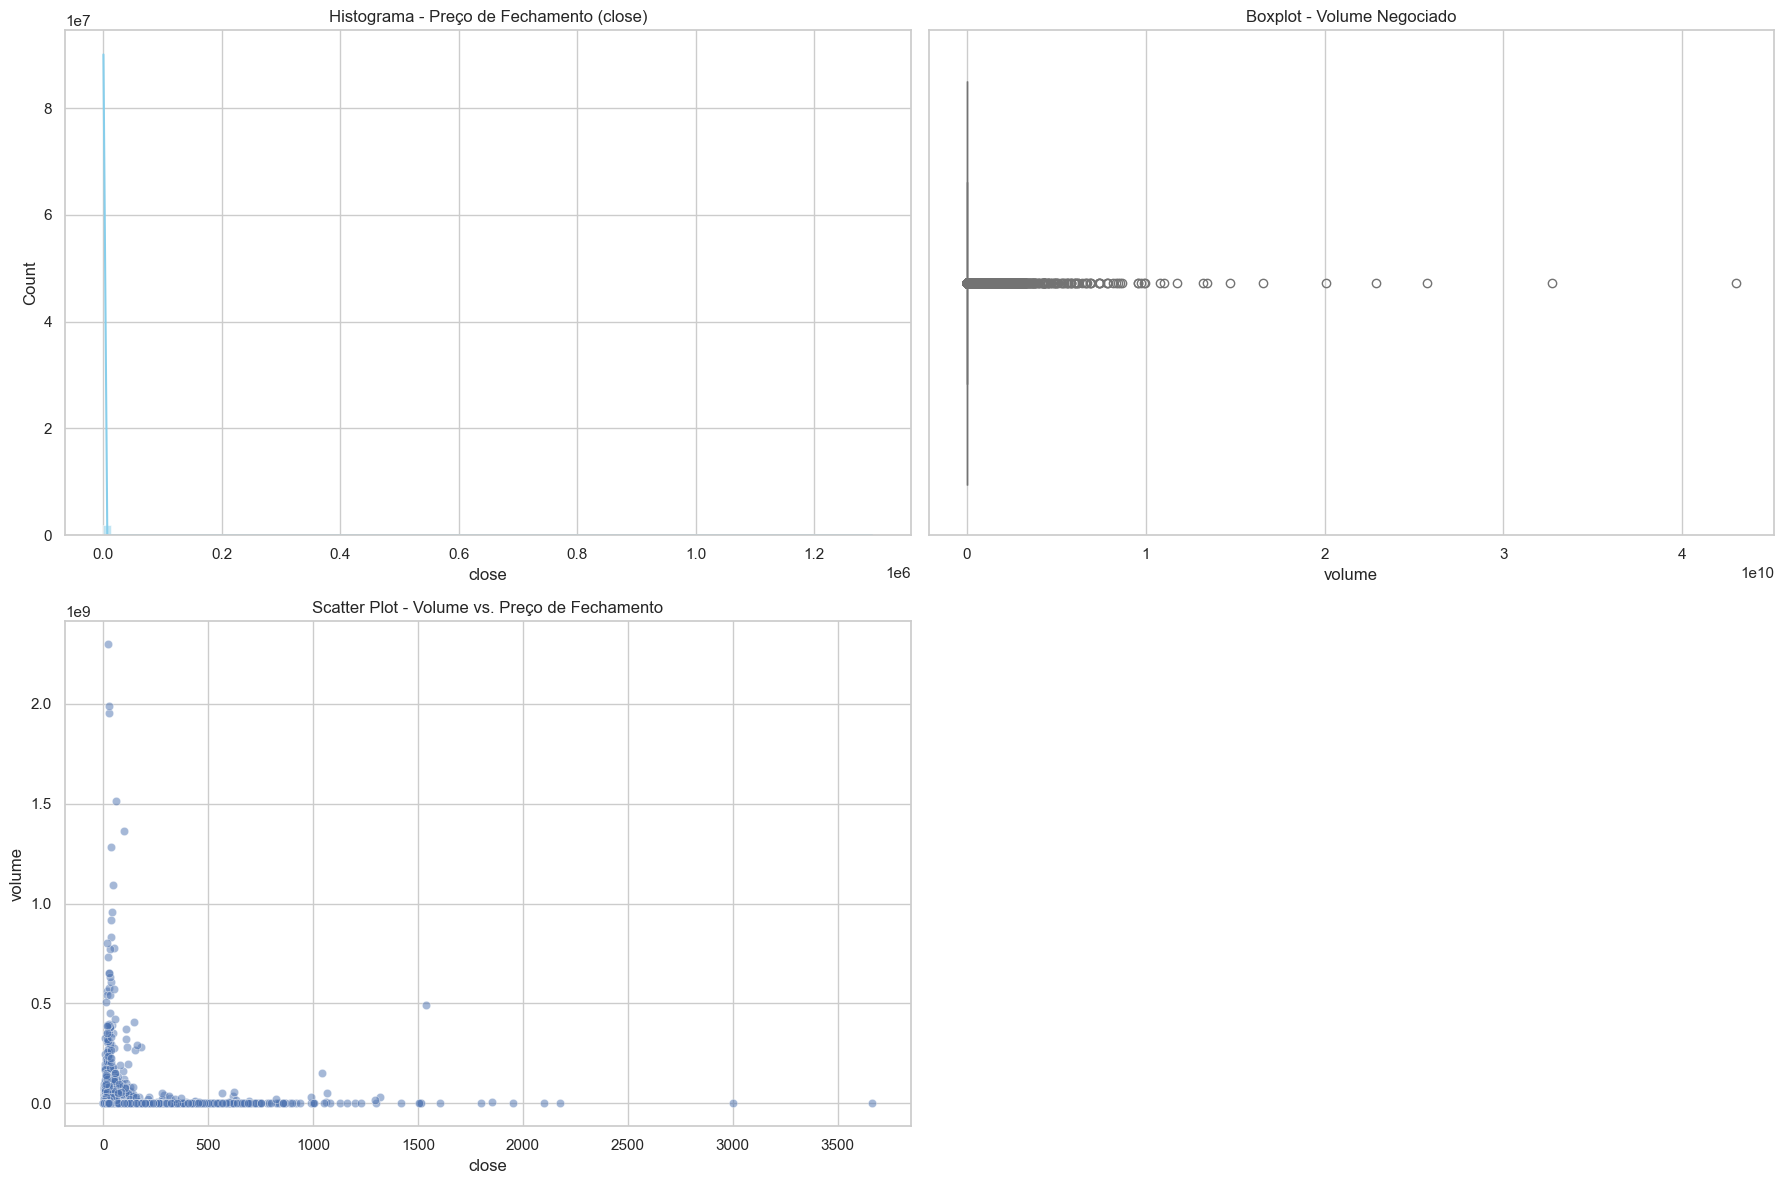

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configura√ß√µes
sns.set(style="whitegrid")
plt.figure(figsize=(18, 12))

# 1. Histograma - Pre√ßo de Fechamento
plt.subplot(2, 2, 1)
sns.histplot(df_clean['close'], bins=100, kde=True, color='skyblue')
plt.title('Histograma - Pre√ßo de Fechamento (close)')

# 2. Boxplot - Volume
plt.subplot(2, 2, 2)
sns.boxplot(x=df_clean['volume'], color='lightgreen')
plt.title('Boxplot - Volume Negociado')

# 3. Scatter Plot - Volume vs. Pre√ßo de Fechamento
plt.subplot(2, 2, 3)
sns.scatterplot(x='close', y='volume', data=df_clean.sample(5000, random_state=42), alpha=0.5)
plt.title('Scatter Plot - Volume vs. Pre√ßo de Fechamento')

plt.tight_layout()
plt.show()


üìä Um histograma para a vari√°vel close;

üì¶ Um boxplot da vari√°vel volume;

üìç Um gr√°fico de dispers√£o entre close e volume (com amostra de 5000 linhas para performance).

In [19]:
print(df.columns)

Index(['datetime', 'ticker', 'open', 'close', 'high', 'low', 'volume'], dtype='object')


An√°lise da Evolu√ß√£o dos Pre√ßos ao Longo do Tempo para Tickers Espec√≠ficos (usando a coluna 'datetime'):

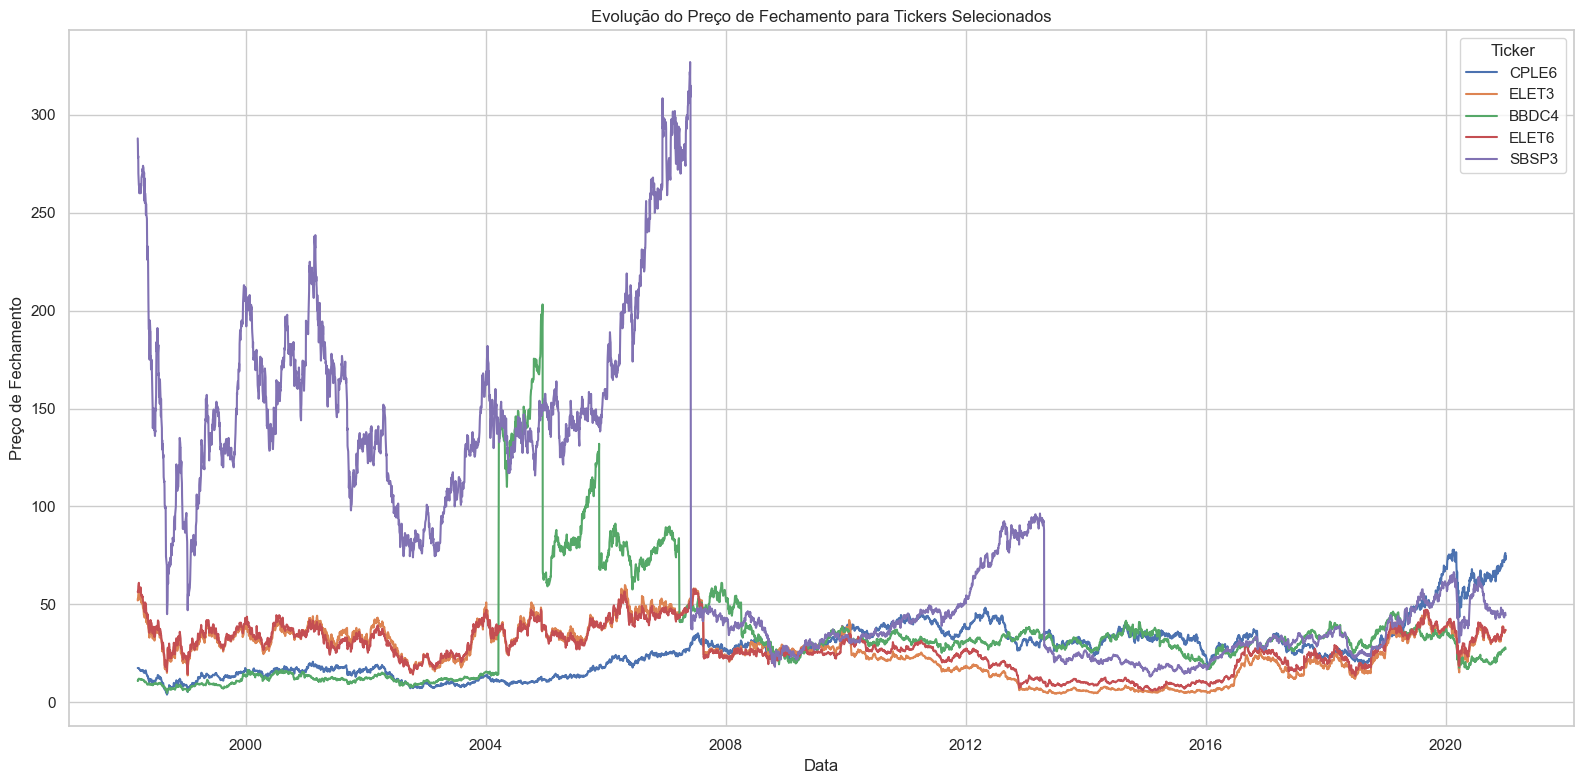

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Converter a coluna 'datetime' para datetime (garantindo que esteja no formato correto)
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.sort_values(by='datetime')

# Identificar os tickers mais frequentes (top 5 para exemplo)
top_tickers = df['ticker'].value_counts().nlargest(5).index

plt.figure(figsize=(16, 8))
for ticker in top_tickers:
    df_ticker = df[df['ticker'] == ticker]
    plt.plot(df_ticker['datetime'], df_ticker['close'], label=ticker)

plt.title('Evolu√ß√£o do Pre√ßo de Fechamento para Tickers Selecionados')
plt.xlabel('Data')
plt.ylabel('Pre√ßo de Fechamento')
plt.legend(title='Ticker')
plt.grid(True)
plt.tight_layout()
plt.show()

An√°lise do Volume Negociado ao Longo do Tempo para Tickers Espec√≠ficos:

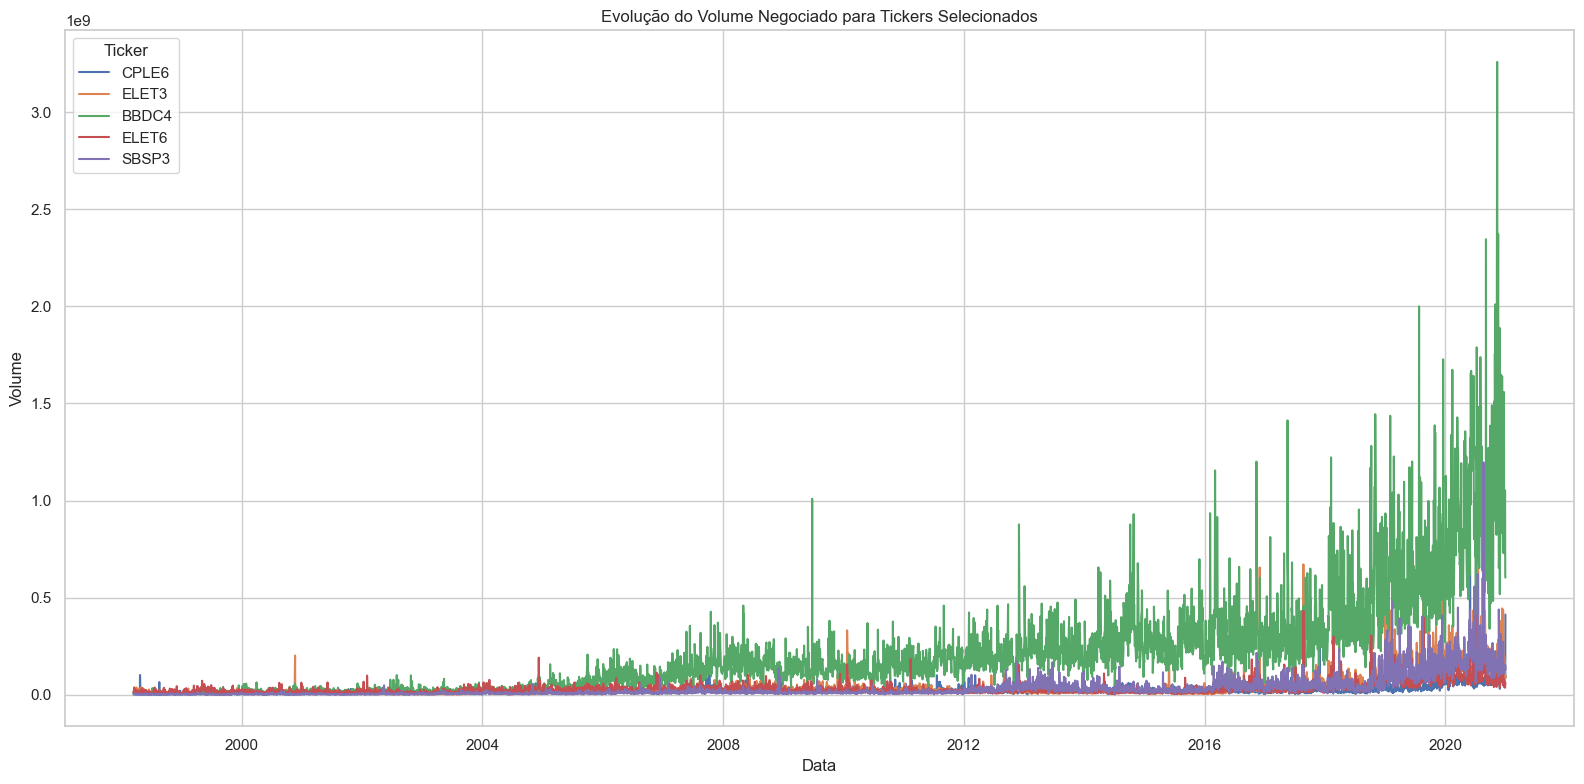

In [21]:
plt.figure(figsize=(16, 8))
for ticker in top_tickers:
    df_ticker = df[df['ticker'] == ticker]
    plt.plot(df_ticker['datetime'], df_ticker['volume'], label=ticker)

plt.title('Evolu√ß√£o do Volume Negociado para Tickers Selecionados')
plt.xlabel('Data')
plt.ylabel('Volume')
plt.legend(title='Ticker')
plt.grid(True)
plt.tight_layout()
plt.show()

Boxplots das Vari√°veis Num√©ricas por Ticker (para alguns tickers):

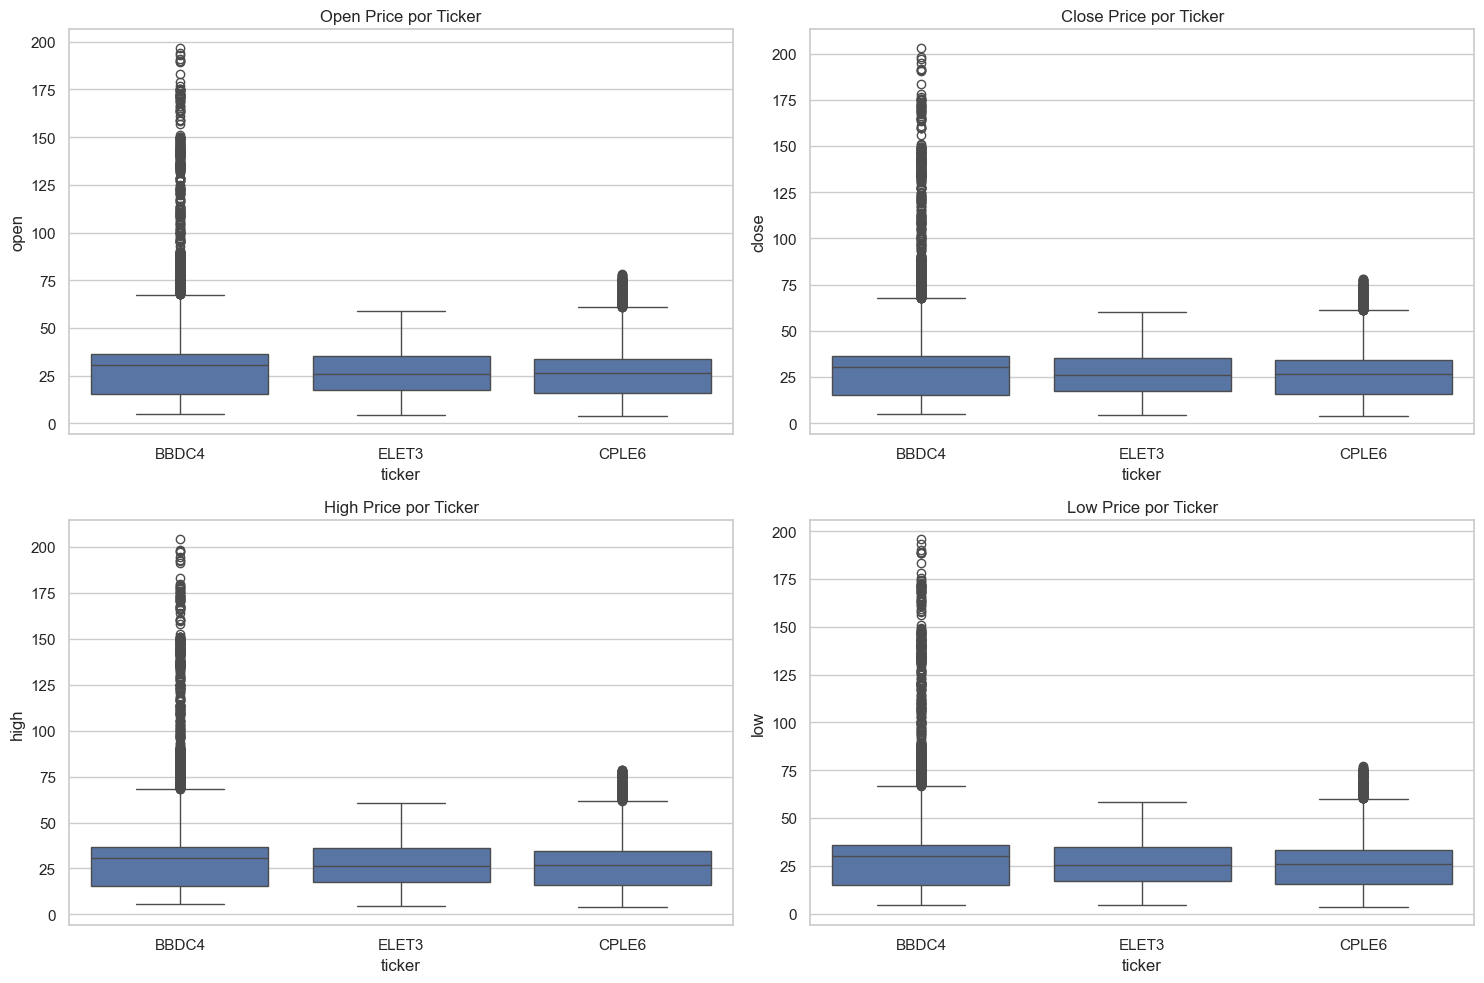

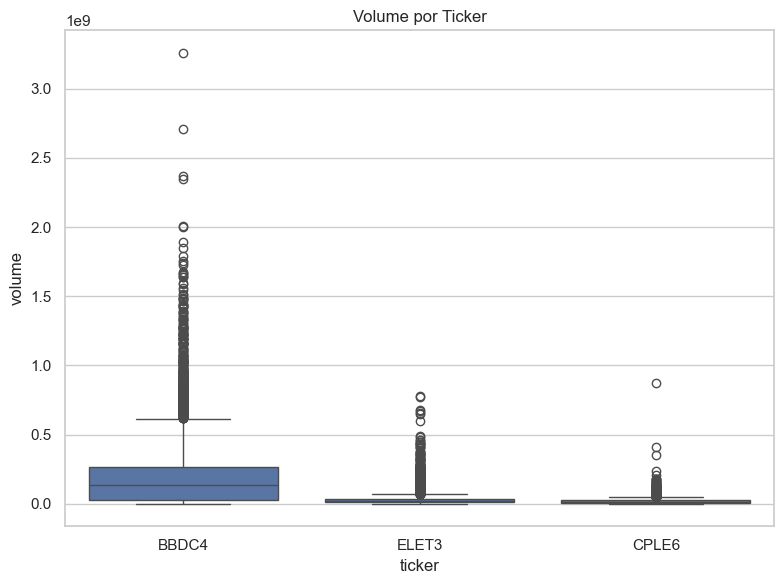

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar alguns tickers para an√°lise
selected_tickers = top_tickers[:3]
df_selected_tickers = df[df['ticker'].isin(selected_tickers)]

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='ticker', y='open', data=df_selected_tickers)
plt.title('Open Price por Ticker')

plt.subplot(2, 2, 2)
sns.boxplot(x='ticker', y='close', data=df_selected_tickers)
plt.title('Close Price por Ticker')

plt.subplot(2, 2, 3)
sns.boxplot(x='ticker', y='high', data=df_selected_tickers)
plt.title('High Price por Ticker')

plt.subplot(2, 2, 4)
sns.boxplot(x='ticker', y='low', data=df_selected_tickers)
plt.title('Low Price por Ticker')

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='ticker', y='volume', data=df_selected_tickers)
plt.title('Volume por Ticker')
plt.tight_layout()
plt.show()

2.4. Teste de Normalidade (opcional para desafio extra):
o Realizar teste Kolmogorov-Smirnov para alguma vari√°vel num√©rica.


In [23]:
from scipy.stats import kstest
import numpy as np

# Extrair a coluna 'close'
close_prices = df['close'].dropna()

# Realizar o Teste de Kolmogorov-Smirnov contra uma distribui√ß√£o normal
# Precisamos padronizar os dados para ter m√©dia 0 e desvio padr√£o 1
mean_close = np.mean(close_prices)
std_close = np.std(close_prices)
normalized_close = (close_prices - mean_close) / std_close

# Executar o teste K-S
ks_statistic, p_value = kstest(normalized_close, 'norm')

print(f"Estat√≠stica K-S: {ks_statistic:.4f}")
print(f"Valor p: {p_value:.4f}")

# Interpreta√ß√£o do resultado
alpha = 0.05
if p_value > alpha:
    print("A distribui√ß√£o dos pre√ßos de fechamento (normalizados) parece ser normal (falha ao rejeitar H0).")
else:
    print("A distribui√ß√£o dos pre√ßos de fechamento (normalizados) n√£o parece ser normal (rejeita H0).")

Estat√≠stica K-S: 0.4839
Valor p: 0.0000
A distribui√ß√£o dos pre√ßos de fechamento (normalizados) n√£o parece ser normal (rejeita H0).


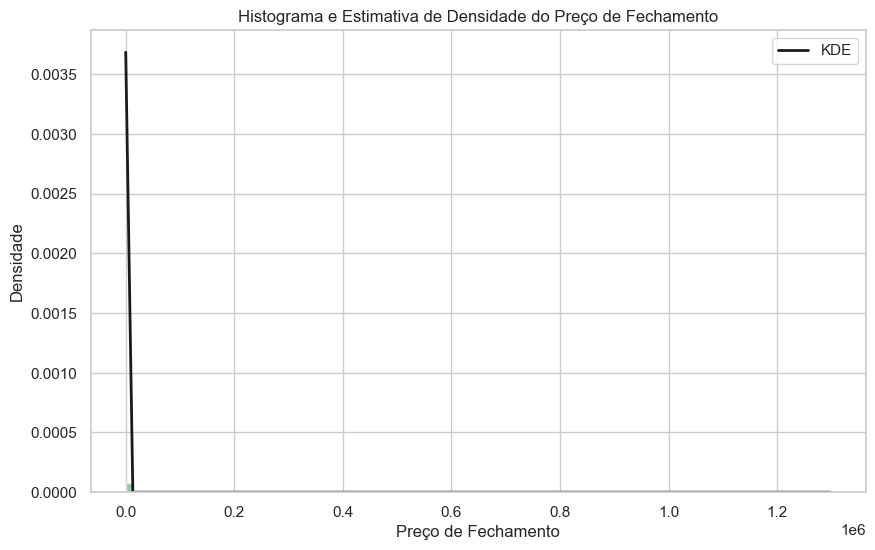

<Figure size 1000x600 with 0 Axes>

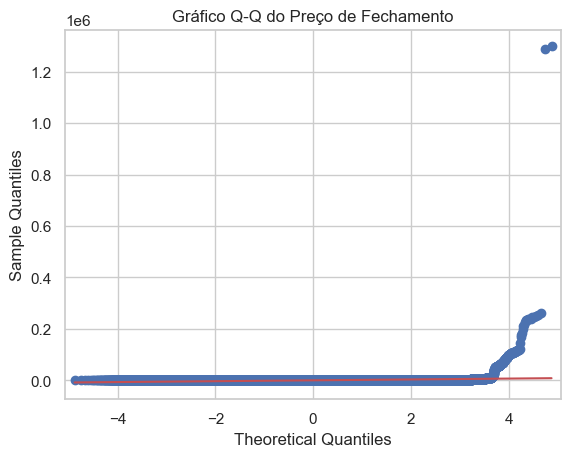

In [26]:
import matplotlib.pyplot as plt
import scipy.stats as st

plt.figure(figsize=(10, 6))
plt.hist(df['close'], bins=100, density=True, alpha=0.6, color='g')
kde = st.gaussian_kde(df['close'])
x = np.linspace(df['close'].min(), df['close'].max(), 100)
plt.plot(x, kde(x), 'k', linewidth=2, label='KDE')
plt.title('Histograma e Estimativa de Densidade do Pre√ßo de Fechamento')
plt.xlabel('Pre√ßo de Fechamento')
plt.ylabel('Densidade')
plt.legend()
plt.show()

import statsmodels.api as sm
import numpy as np

plt.figure(figsize=(10, 6))
sm.qqplot(df['close'], line='s')
plt.title('Gr√°fico Q-Q do Pre√ßo de Fechamento')
plt.show()

Matriz de Correla√ß√£o entre Pre√ßo de Fechamento e Volume:
            close    volume
close   1.000000  0.156369
volume  0.156369  1.000000


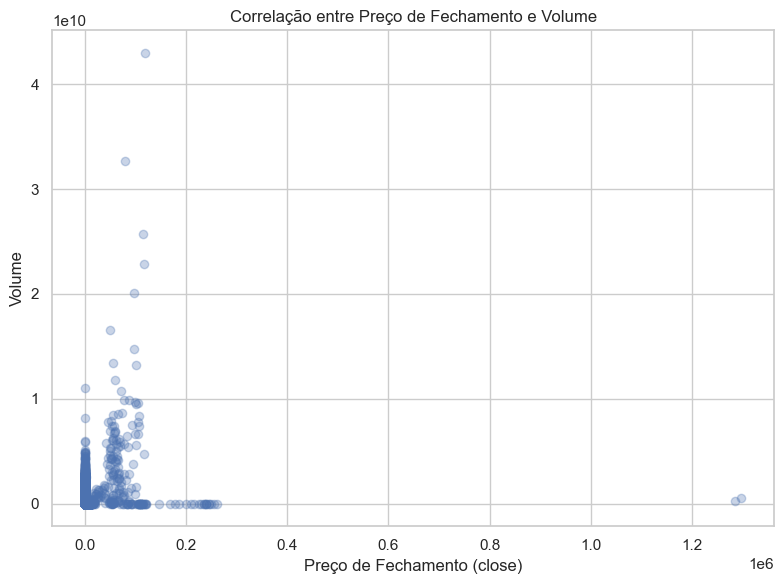

In [25]:
# Calcular a matriz de correla√ß√£o
correlation_matrix = df[['close', 'volume']].corr()

print("Matriz de Correla√ß√£o entre Pre√ßo de Fechamento e Volume:\n", correlation_matrix)

# Visualizar a correla√ß√£o com um scatter plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['close'], df['volume'], alpha=0.3)
plt.title('Correla√ß√£o entre Pre√ßo de Fechamento e Volume')
plt.xlabel('Pre√ßo de Fechamento (close)')
plt.ylabel('Volume')
plt.grid(True)
plt.tight_layout()
plt.show()

Scatter Plot: A dispers√£o dos pontos no gr√°fico ajudar√° a visualizar a rela√ß√£o. Se os pontos formarem uma tend√™ncia (para cima ou para baixo), isso sugere uma correla√ß√£o.

In [30]:
import pandas as pd

# Ler apenas a primeira linha do arquivo para obter os nomes das colunas
with open("b3_stocks_1994_2020.csv", 'r') as f:
    first_line = f.readline().strip()
    column_names = first_line.split(',')
    print("Nomes das colunas no arquivo CSV:", column_names)

Nomes das colunas no arquivo CSV: ['datetime', 'ticker', 'open', 'close', 'high', 'low', 'volume']


In [32]:
import pandas as pd

# Carregar o dataset, convertendo a coluna 'datetime' para o tipo datetime
df = pd.read_csv("b3_stocks_1994_2020.csv", parse_dates=['datetime'])

# Renomear a coluna 'datetime' para 'date'
df = df.rename(columns={'datetime': 'date'})

# Ordenar por data
df = df.sort_values('date')

# Exibir as primeiras linhas e informa√ß√µes para verificar
print(df.head())
print(df.info())

         date ticker    open   close    high     low   volume
0  1994-07-04  ACE 3    48.0    48.0    48.0    47.0  46550.0
92 1994-07-04  MTB 3  1450.0  1450.0  1450.0  1450.0   4350.0
93 1994-07-04  BNA 3    20.0    20.0    20.0    20.0  34600.0
94 1994-07-04  BNA 4    19.2    19.5    19.5    19.2   4254.0
95 1994-07-04  OLM 4     3.0     3.0     3.0     3.0     90.0
<class 'pandas.core.frame.DataFrame'>
Index: 1883203 entries, 0 to 1881264
Data columns (total 7 columns):
 #   Column  Dtype         
---  ------  -----         
 0   date    datetime64[ns]
 1   ticker  object        
 2   open    float64       
 3   close   float64       
 4   high    float64       
 5   low     float64       
 6   volume  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 114.9+ MB
None


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que df j√° esteja carregado e com a coluna 'date' no formato datetime
# e que ibov_df esteja carregado com 'date' como √≠ndice e 'ibov_close' como coluna

# 1. Identificar os principais tickers
top_n = 5
top_tickers = df['ticker'].value_counts().nlargest(top_n).index.tolist()
print("Principais Tickers:", top_tickers)

# 2. Preparar os dados dos tickers
tickers_data = {}
for ticker in top_tickers:
    ticker_df = df[df['ticker'] == ticker][['date', 'close']].sort_values('date').set_index('date').rename(columns={'close': f'{ticker}_close'})
    tickers_data[ticker] = ticker_df

# 3. Combinar os dados com o Ibovespa
if 'ibov_df' in locals():
    combined_df = ibov_df.copy()
    for ticker, ticker_df in tickers_data.items():
        combined_df = pd.merge(combined_df, ticker_df, on='date', how='inner')

    print("Primeiras linhas dos dados combinados:\n", combined_df.head())

    # 4. Calcular a matriz de correla√ß√£o com o Ibovespa
    correlation_with_ibov = combined_df.corr()['ibov_close'].drop('ibov_close').sort_values(ascending=False)
    print("\nCorrela√ß√£o com o Ibovespa:\n", correlation_with_ibov)

    # 5. Visualizar a correla√ß√£o
    plt.figure(figsize=(10, 6))
    sns.barplot(x=correlation_with_ibov.index, y=correlation_with_ibov.values, palette='viridis')
    plt.title('Correla√ß√£o dos Principais Tickers com o Ibovespa')
    plt.xlabel('Ticker')
    plt.ylabel('Coeficiente de Correla√ß√£o')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

else:
    print("Por favor, carregue e prepare os dados do Ibovespa em um DataFrame chamado 'ibov_df' com 'date' como √≠ndice e 'ibov_close' como coluna.")

Principais Tickers: ['BBDC4', 'CPLE6', 'SBSP3', 'ELET6', 'ELET3']
Por favor, carregue e prepare os dados do Ibovespa em um DataFrame chamado 'ibov_df' com 'date' como √≠ndice e 'ibov_close' como coluna.


In [37]:
import pandas as pd

# Carregar o dataset, convertendo a coluna 'datetime' para o tipo datetime
df = pd.read_csv("b3_stocks_1994_2020.csv", parse_dates=['datetime'])

# Renomear a coluna 'datetime' para 'date' (para seguir o nosso padr√£o)
df = df.rename(columns={'datetime': 'date'})

# Ordenar por data
df = df.sort_values('date')

# Exibir as primeiras linhas e informa√ß√µes para verificar
print(df.head())
print(df.info())

# Agora voc√™ pode prosseguir com o carregamento e prepara√ß√£o do ibov_df

         date ticker    open   close    high     low   volume
0  1994-07-04  ACE 3    48.0    48.0    48.0    47.0  46550.0
92 1994-07-04  MTB 3  1450.0  1450.0  1450.0  1450.0   4350.0
93 1994-07-04  BNA 3    20.0    20.0    20.0    20.0  34600.0
94 1994-07-04  BNA 4    19.2    19.5    19.5    19.2   4254.0
95 1994-07-04  OLM 4     3.0     3.0     3.0     3.0     90.0
<class 'pandas.core.frame.DataFrame'>
Index: 1883203 entries, 0 to 1881264
Data columns (total 7 columns):
 #   Column  Dtype         
---  ------  -----         
 0   date    datetime64[ns]
 1   ticker  object        
 2   open    float64       
 3   close   float64       
 4   high    float64       
 5   low     float64       
 6   volume  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 114.9+ MB
None


Principais Tickers: ['CPLE6', 'ELET3', 'BBDC4', 'ELET6', 'SBSP3']

Primeiras linhas do DataFrame de pre√ßos dos principais tickers (ibov_b3):
 ticker      BBDC4  CPLE6  ELET3  ELET6   SBSP3
date                                          
1998-03-16  10.95  17.50  52.00   56.5  287.99
1998-03-17  11.20  17.50  52.99   56.2  285.00
1998-03-18  11.10  17.45  52.30   56.3  278.00
1998-03-19  11.20  17.50  54.50   58.3  279.00
1998-03-20  11.80  17.40  55.20   59.2  270.00

Matriz de Correla√ß√£o entre os Principais Tickers (ibov_b3):
 ticker     BBDC4     CPLE6     ELET3     ELET6     SBSP3
ticker                                                  
BBDC4   1.000000 -0.078143  0.310947  0.290105  0.231641
CPLE6  -0.078143  1.000000 -0.167173 -0.103648 -0.479614
ELET3   0.310947 -0.167173  1.000000  0.976427  0.703552
ELET6   0.290105 -0.103648  0.976427  1.000000  0.690294
SBSP3   0.231641 -0.479614  0.703552  0.690294  1.000000


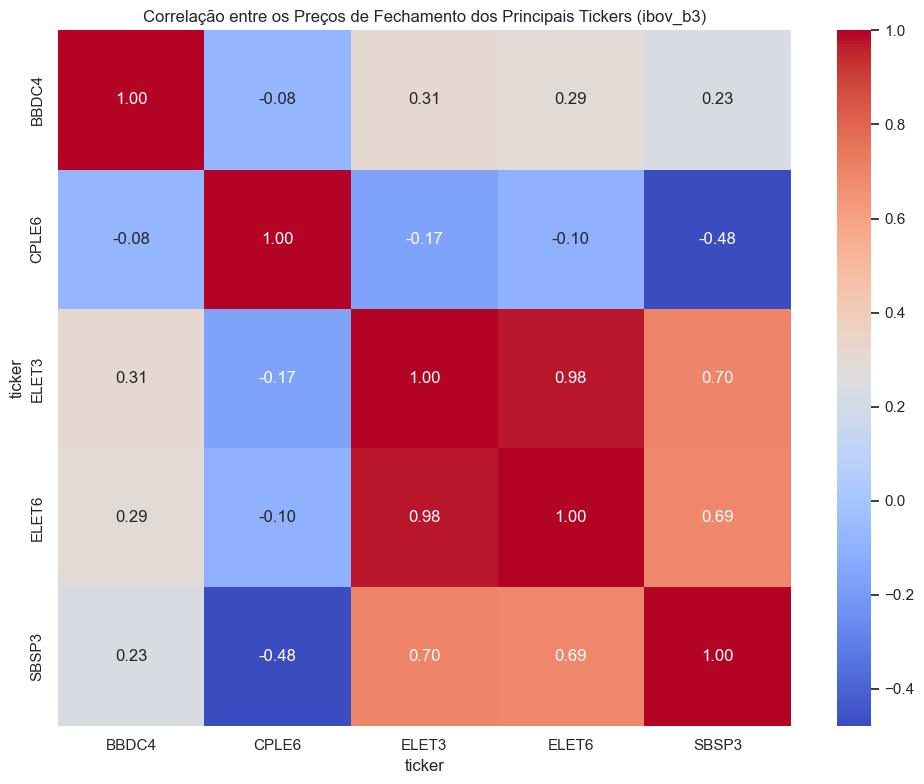

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carregar o dataset de a√ß√µes
# Use o nome correto da coluna de data: 'datetime'
df = pd.read_csv("b3_stocks_1994_2020.csv", parse_dates=['datetime']).rename(columns={'datetime': 'date'})

# 2. Limpar os dados (remover registros com volume ou close igual a zero)
df_ibov_b3 = df[(df['close'] > 0) & (df['volume'] > 0)].copy()

# 3. Converter a coluna 'date' para o tipo date (sem a hora) e ordenar
df_ibov_b3['date'] = pd.to_datetime(df_ibov_b3['date']).dt.date
df_ibov_b3 = df_ibov_b3.sort_values('date')

# 4. Identificar os principais tickers (os 5 com mais ocorr√™ncias)
top_n = 5
top_tickers = df_ibov_b3['ticker'].value_counts().nlargest(top_n).index.tolist()
print("Principais Tickers:", top_tickers)

# 5. Criar um DataFrame com os pre√ßos de fechamento dos principais tickers
prices_df_ibov_b3 = df_ibov_b3[df_ibov_b3['ticker'].isin(top_tickers)].pivot_table(index='date', columns='ticker', values='close')
print("\nPrimeiras linhas do DataFrame de pre√ßos dos principais tickers (ibov_b3):\n", prices_df_ibov_b3.head())

# 6. Calcular a matriz de correla√ß√£o entre os principais tickers
correlation_matrix_ibov_b3 = prices_df_ibov_b3.corr()
print("\nMatriz de Correla√ß√£o entre os Principais Tickers (ibov_b3):\n", correlation_matrix_ibov_b3)

# 7. Visualizar a matriz de correla√ß√£o com um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_ibov_b3, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correla√ß√£o entre os Pre√ßos de Fechamento dos Principais Tickers (ibov_b3)')
plt.tight_layout()
plt.show()

Principais Tickers: Os 5 tickers com maior frequ√™ncia no seu dataset s√£o 'CPLE6', 'ELET3', 'BBDC4', 'ELET6' e 'SBSP3'.
Primeiras linhas do DataFrame de pre√ßos: Voc√™ tem um DataFrame onde as datas s√£o os √≠ndices e as colunas s√£o os pre√ßos de fechamento desses 5 tickers.
Matriz de Correla√ß√£o: A matriz de correla√ß√£o mostra como o pre√ßo de fechamento de cada par desses tickers se move em rela√ß√£o ao outro ao longo do tempo.
Interpreta√ß√£o da Matriz de Correla√ß√£o:

Valores pr√≥ximos de 1 indicam uma correla√ß√£o positiva forte (quando um pre√ßo sobe, o outro tende a subir tamb√©m).
Valores pr√≥ximos de -1 indicam uma correla√ß√£o negativa forte (quando um pre√ßo sobe, o outro tende a cair).
Valores pr√≥ximos de 0 indicam pouca ou nenhuma correla√ß√£o linear.
Analisando a matriz:

ELET3 e ELET6 t√™m uma correla√ß√£o muito alta (0.98), o que sugere que seus pre√ßos se movem de forma muito semelhante. Isso √© esperado, pois geralmente s√£o diferentes classes de a√ß√µes da mesma empresa (a√ß√µes ordin√°rias e preferenciais).
ELET3 e SBSP3, e ELET6 e SBSP3 tamb√©m apresentam correla√ß√µes positivas consider√°veis (0.70 e 0.69, respectivamente).
CPLE6 parece ter correla√ß√µes negativas ou fracas com as outras a√ß√µes, especialmente com SBSP3 (-0.48).
BBDC4 mostra correla√ß√µes positivas fracas a moderadas com as outras a√ß√µes, exceto por uma correla√ß√£o negativa fraca com CPLE6.
O gr√°fico de heatmap que foi gerado visualiza essa matriz de correla√ß√£o, tornando mais f√°cil identificar os pares de tickers com correla√ß√µes mais fortes.

In [51]:
import os
import pandas as pd

print("Current working directory:", os.getcwd())

try:
    selic_df = pd.read_csv('selic.csv', nrows=1)
    print("Column names in selic.csv:", selic_df.columns.tolist())
except FileNotFoundError:
    print("Error: selic.csv not found. Please provide the correct path to the file.")

try:
    usdbrl_df = pd.read_csv('usd2brl.csv', nrows=1)
    print("Column names in usd2brl.csv:", usdbrl_df.columns.tolist())
except FileNotFoundError:
    print("Error: usd2brl.csv not found. Please provide the correct path to the file.")

Current working directory: c:\Users\Guilherme e Beatriz\OneDrive\√Årea de Trabalho\A7-aplicando conhecimento
Column names in selic.csv: ['datetime', 'selic']
Column names in usd2brl.csv: ['datetime', 'usd_brl']


In [60]:
# Carregar dados B3
try:
    df_b3 = pd.read_csv("b3_stocks_1994_2020.csv", parse_dates=['datetime'])
    df_b3 = df_b3[(df_b3['close'] > 0) & (df_b3['volume'] > 0)].copy()
    df_b3['date'] = pd.to_datetime(df_b3['datetime']).dt.date
    df_b3 = df_b3.sort_values('date')
    top_ticker_b3 = df_b3['ticker'].value_counts().nlargest(1).index.tolist()[0]
    b3_ticker_df = df_b3[df_b3['ticker'] == top_ticker_b3][['date', 'close']].set_index('date').rename(columns={'close': top_ticker_b3})
    print("Dados B3 carregados com sucesso.")
except FileNotFoundError:
    print("Erro: Arquivo b3_stocks_1994_2020.csv n√£o encontrado na mesma pasta.")
    df_b3 = None
    top_ticker_b3 = None
    b3_ticker_df = None
except ValueError as e:
    print(f"Erro ao carregar ou processar dados B3: {e}")
    df_b3 = None
    top_ticker_b3 = None
    b3_ticker_df = None

Dados B3 carregados com sucesso.


In [68]:
import pandas as pd
from scipy.stats import mode

def calcular_estatisticas(series):
    """Calcula as estat√≠sticas descritivas de uma Series do pandas."""
    estatisticas = {}
    estatisticas['M√©dia'] = series.mean()
    estatisticas['Mediana'] = series.median()
    try:
        mode_result = mode(series, keepdims=True)
        estatisticas['Moda'] = mode_result[0][0] if len(mode_result[0]) > 0 else 'N√£o existe'
    except:
        estatisticas['Moda'] = 'N√£o aplic√°vel (n√£o num√©rico)'
    estatisticas['M√≠nimo'] = series.min()
    estatisticas['M√°ximo'] = series.max()
    return estatisticas

# Carregar os dados
try:
    selic_df = pd.read_csv('selic.csv', parse_dates=['datetime']).rename(columns={'datetime': 'date', 'selic': 'selic'})
    selic_df = selic_df.set_index('date')['selic']
    print("Dados da Selic carregados.")
except FileNotFoundError:
    print("Erro: Arquivo selic.csv n√£o encontrado.")
    selic_df = None

try:
    usdbrl_df = pd.read_csv('usd2brl.csv', parse_dates=['datetime']).rename(columns={'datetime': 'date', 'usd_brl': 'usd_brl'})
    usdbrl_df = usdbrl_df.set_index('date')['usd_brl']
    print("Dados do USD/BRL carregados.")
except FileNotFoundError:
    print("Erro: Arquivo usd2brl.csv n√£o encontrado.")
    usdbrl_df = None

b3_ticker_df = None
top_ticker_b3 = None
try:
    df_b3 = pd.read_csv("b3_stocks_1994_2020.csv", parse_dates=['datetime'])
    df_b3 = df_b3[(df_b3['close'] > 0) & (df_b3['volume'] > 0)].copy()
    df_b3['date'] = pd.to_datetime(df_b3['datetime']).dt.date
    df_b3 = df_b3.sort_values('date')
    top_ticker_b3 = df_b3['ticker'].value_counts().idxmax()
    b3_ticker_df = df_b3[df_b3['ticker'] == top_ticker_b3].set_index('date')['close']
    b3_ticker_df.rename(top_ticker_b3, inplace=True)
    print(f"Dados da a√ß√£o {top_ticker_b3} carregados.")
except FileNotFoundError:
    print("Erro: Arquivo b3_stocks_1994_2020.csv n√£o encontrado.")
except ValueError as e:
    print(f"Erro ao processar dados B3: {e}")

# Calcular as estat√≠sticas
estatisticas = {}

if selic_df is not None:
    estatisticas['Selic'] = calcular_estatisticas(selic_df)

if usdbrl_df is not None:
    estatisticas['USD/BRL'] = calcular_estatisticas(usdbrl_df)

if b3_ticker_df is not None and top_ticker_b3 is not None:
    estatisticas[f'A√ß√£o {top_ticker_b3}'] = calcular_estatisticas(b3_ticker_df)

# Criar a tabela comparativa
tabela_comparativa = pd.DataFrame(estatisticas)

# Imprimir a tabela
print("\nTabela Comparativa de Estat√≠sticas:")
print(tabela_comparativa)

Dados da Selic carregados.
Dados do USD/BRL carregados.
Dados da a√ß√£o CPLE6 carregados.

Tabela Comparativa de Estat√≠sticas:
            Selic   USD/BRL  A√ß√£o CPLE6
M√©dia    0.000615  2.363138   26.915082
Mediana  0.000525  2.166800   26.500000
Moda     0.000246  0.936000   16.000000
M√≠nimo   0.000075  0.829000    3.900000
M√°ximo   0.003997  5.937200   77.910000


Dados da Selic carregados.
Dados do USD/BRL carregados.
Dados da a√ß√£o CPLE6 carregados.


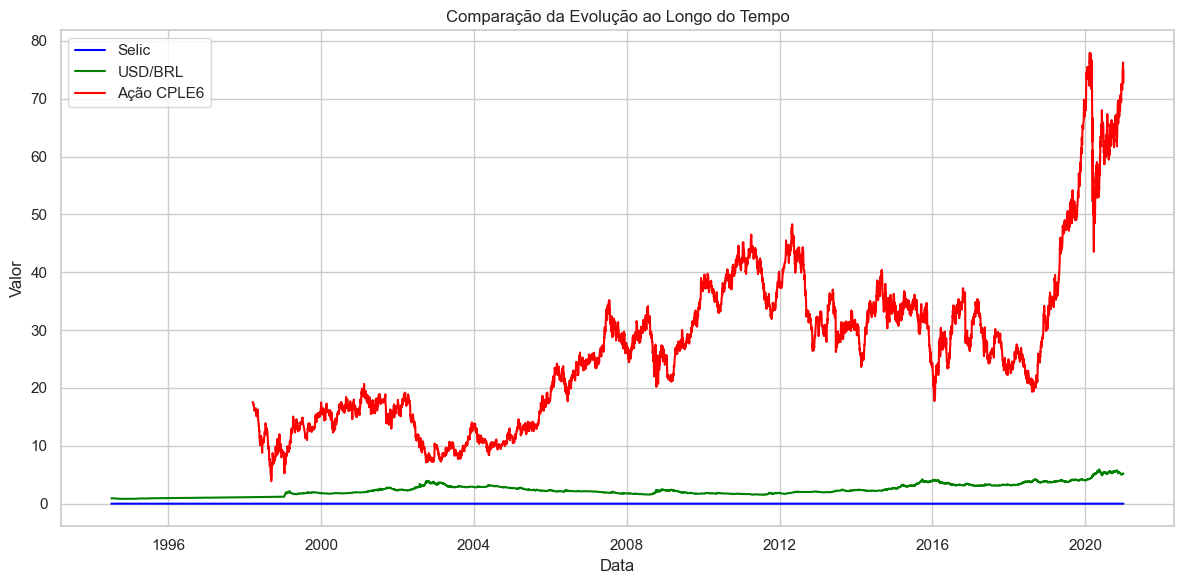

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mode

def calcular_estatisticas(series):
    """Calcula as estat√≠sticas descritivas de uma Series do pandas."""
    estatisticas = {}
    estatisticas['M√©dia'] = series.mean()
    estatisticas['Mediana'] = series.median()
    try:
        mode_result = mode(series, keepdims=True)
        estatisticas['Moda'] = mode_result[0][0] if len(mode_result[0]) > 0 else 'N√£o existe'
    except:
        estatisticas['Moda'] = 'N√£o aplic√°vel (n√£o num√©rico)'
    estatisticas['M√≠nimo'] = series.min()
    estatisticas['M√°ximo'] = series.max()
    return estatisticas

# Carregar os dados (mantendo a estrutura de carregamento anterior)
try:
    selic_df = pd.read_csv('selic.csv', parse_dates=['datetime']).rename(columns={'datetime': 'date', 'selic': 'selic'})
    selic_df = selic_df.set_index('date')['selic']
    print("Dados da Selic carregados.")
except FileNotFoundError:
    print("Erro: Arquivo selic.csv n√£o encontrado.")
    selic_df = None

try:
    usdbrl_df = pd.read_csv('usd2brl.csv', parse_dates=['datetime']).rename(columns={'datetime': 'date', 'usd_brl': 'usd_brl'})
    usdbrl_df = usdbrl_df.set_index('date')['usd_brl']
    print("Dados do USD/BRL carregados.")
except FileNotFoundError:
    print("Erro: Arquivo usd2brl.csv n√£o encontrado.")
    usdbrl_df = None

b3_ticker_df_full = None
top_ticker_b3 = None
try:
    df_b3 = pd.read_csv("b3_stocks_1994_2020.csv", parse_dates=['datetime'])
    df_b3 = df_b3[(df_b3['close'] > 0) & (df_b3['volume'] > 0)].copy()
    df_b3['date'] = pd.to_datetime(df_b3['datetime']).dt.date
    df_b3 = df_b3.sort_values('date')
    top_ticker_b3 = 'CPLE6'  # Usando 'CPLE6' conforme a sa√≠da anterior
    b3_ticker_df_full = df_b3[df_b3['ticker'] == top_ticker_b3].set_index('date')['close']
    print(f"Dados da a√ß√£o {top_ticker_b3} carregados.")
except FileNotFoundError:
    print("Erro: Arquivo b3_stocks_1994_2020.csv n√£o encontrado.")
except ValueError as e:
    print(f"Erro ao processar dados B3: {e}")

# Criar o gr√°fico de linhas
plt.figure(figsize=(12, 6))

if selic_df is not None:
    plt.plot(selic_df.index, selic_df.values, label='Selic', color='blue')

if usdbrl_df is not None:
    plt.plot(usdbrl_df.index, usdbrl_df.values, label='USD/BRL', color='green')

if b3_ticker_df_full is not None and top_ticker_b3 is not None:
    plt.plot(b3_ticker_df_full.index, b3_ticker_df_full.values, label=f'A√ß√£o {top_ticker_b3}', color='red')

plt.title('Compara√ß√£o da Evolu√ß√£o ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Histogramas:
Este c√≥digo gera tr√™s histogramas lado a lado, mostrando a distribui√ß√£o dos valores para Selic, USD/BRL e o pre√ßo da a√ß√£o CPLE6.


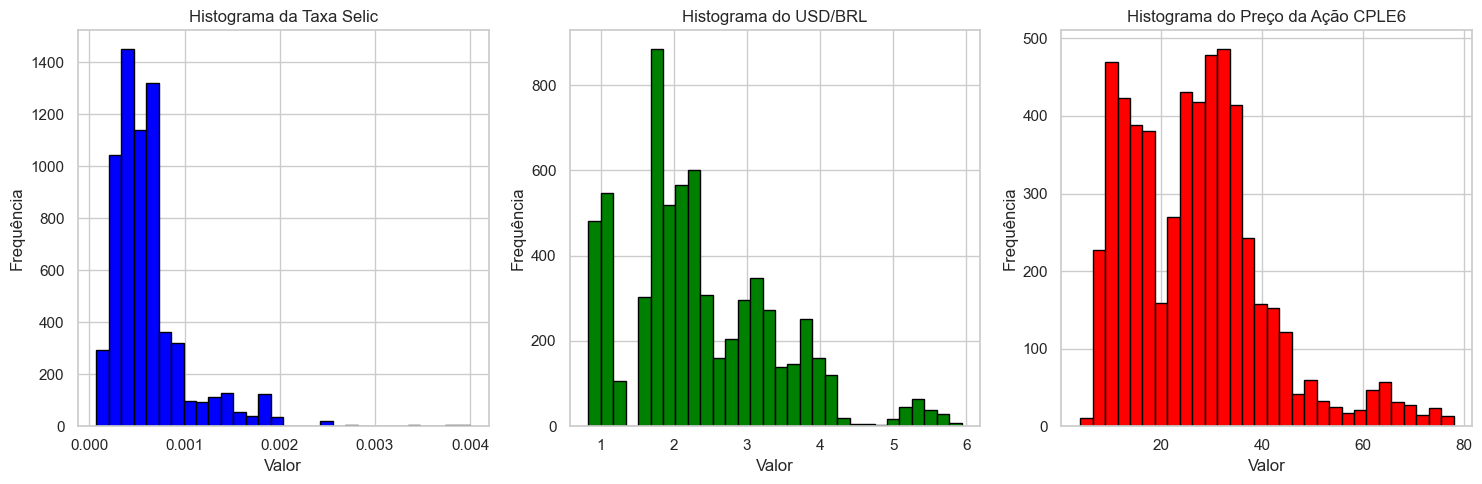

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados (mantendo a estrutura de carregamento anterior)
try:
    selic_df = pd.read_csv('selic.csv', parse_dates=['datetime']).rename(columns={'datetime': 'date', 'selic': 'selic'})
    selic_df = selic_df.set_index('date')['selic']
except FileNotFoundError:
    selic_df = None

try:
    usdbrl_df = pd.read_csv('usd2brl.csv', parse_dates=['datetime']).rename(columns={'datetime': 'date', 'usd_brl': 'usd_brl'})
    usdbrl_df = usdbrl_df.set_index('date')['usd_brl']
except FileNotFoundError:
    usdbrl_df = None

b3_ticker_df_full = None
top_ticker_b3 = None
try:
    df_b3 = pd.read_csv("b3_stocks_1994_2020.csv", parse_dates=['datetime'])
    df_b3 = df_b3[(df_b3['close'] > 0) & (df_b3['volume'] > 0)].copy()
    df_b3['date'] = pd.to_datetime(df_b3['datetime']).dt.date
    df_b3 = df_b3.sort_values('date')
    top_ticker_b3 = 'CPLE6'
    b3_ticker_df_full = df_b3[df_b3['ticker'] == top_ticker_b3].set_index('date')['close']
except FileNotFoundError:
    b3_ticker_df_full = None
    top_ticker_b3 = None

# Gerar histogramas
plt.figure(figsize=(15, 5))

if selic_df is not None:
    plt.subplot(1, 3, 1)
    selic_df.hist(bins=30, color='blue', edgecolor='black')
    plt.title('Histograma da Taxa Selic')
    plt.xlabel('Valor')
    plt.ylabel('Frequ√™ncia')

if usdbrl_df is not None:
    plt.subplot(1, 3, 2)
    usdbrl_df.hist(bins=30, color='green', edgecolor='black')
    plt.title('Histograma do USD/BRL')
    plt.xlabel('Valor')
    plt.ylabel('Frequ√™ncia')

if b3_ticker_df_full is not None and top_ticker_b3 is not None:
    plt.subplot(1, 3, 3)
    b3_ticker_df_full.hist(bins=30, color='red', edgecolor='black')
    plt.title(f'Histograma do Pre√ßo da A√ß√£o {top_ticker_b3}')
    plt.xlabel('Valor')
    plt.ylabel('Frequ√™ncia')

plt.tight_layout()
plt.show()

Box Plots:
Este c√≥digo utiliza a biblioteca seaborn para gerar um box plot comparando a distribui√ß√£o dos valores da Selic, USD/BRL e o pre√ßo da a√ß√£o em um √∫nico gr√°fico.

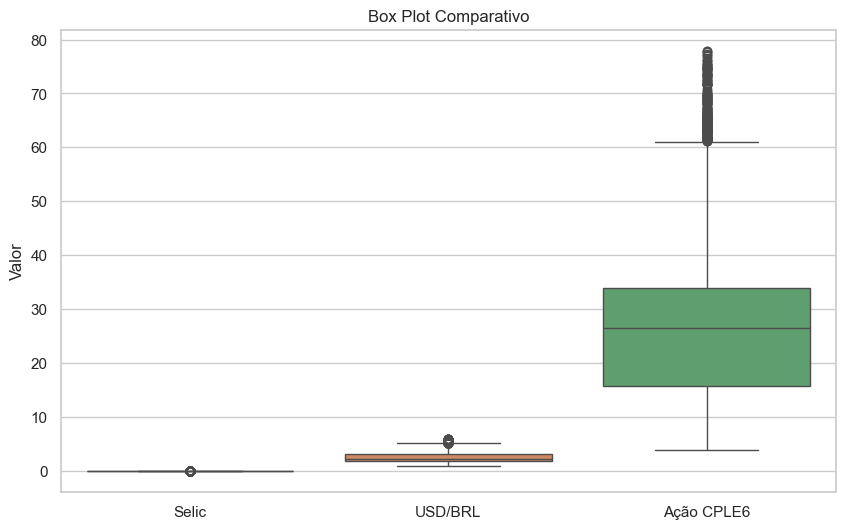

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados (mantendo a estrutura de carregamento anterior)
try:
    selic_df = pd.read_csv('selic.csv', parse_dates=['datetime']).rename(columns={'datetime': 'date', 'selic': 'selic'})
    selic_df = selic_df.set_index('date')['selic']
except FileNotFoundError:
    selic_df = None

try:
    usdbrl_df = pd.read_csv('usd2brl.csv', parse_dates=['datetime']).rename(columns={'datetime': 'date', 'usd_brl': 'usd_brl'})
    usdbrl_df = usdbrl_df.set_index('date')['usd_brl']
except FileNotFoundError:
    usdbrl_df = None

b3_ticker_df_full = None
top_ticker_b3 = None
try:
    df_b3 = pd.read_csv("b3_stocks_1994_2020.csv", parse_dates=['datetime'])
    df_b3 = df_b3[(df_b3['close'] > 0) & (df_b3['volume'] > 0)].copy()
    df_b3['date'] = pd.to_datetime(df_b3['datetime']).dt.date
    df_b3 = df_b3.sort_values('date')
    top_ticker_b3 = 'CPLE6'
    b3_ticker_df_full = df_b3[df_b3['ticker'] == top_ticker_b3].set_index('date')['close']
except FileNotFoundError:
    b3_ticker_df_full = None
    top_ticker_b3 = None

# Criar um DataFrame para os box plots
data_to_plot = pd.DataFrame({
    'Selic': selic_df,
    'USD/BRL': usdbrl_df,
    f'A√ß√£o {top_ticker_b3}': b3_ticker_df_full
})

# Gerar box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_to_plot)
plt.title('Box Plot Comparativo')
plt.ylabel('Valor')
plt.show()

Gr√°ficos de Dispers√£o:
Este c√≥digo gera tr√™s gr√°ficos de dispers√£o, mostrando a rela√ß√£o entre os pares de vari√°veis (Selic vs. USD/BRL, Selic vs. A√ß√£o, USD/BRL vs. A√ß√£o) apenas para os per√≠odos em que ambas as vari√°veis t√™m dados dispon√≠veis.

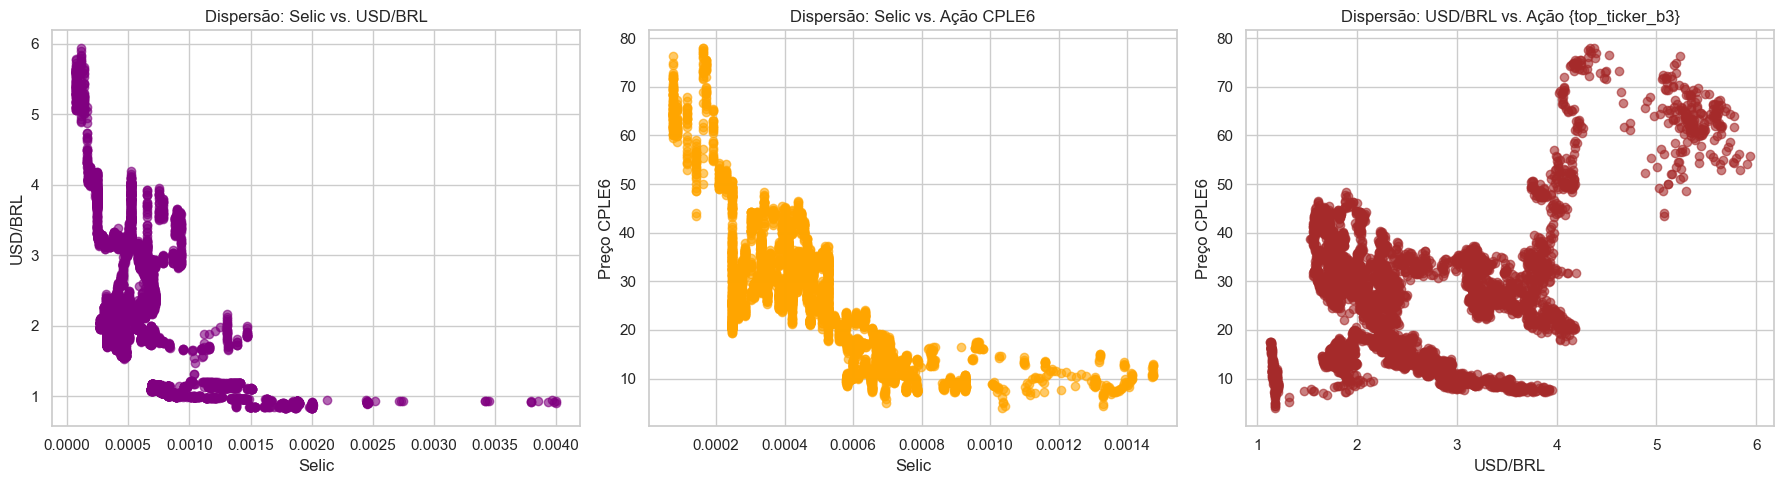

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados (mantendo a estrutura de carregamento anterior)
try:
    selic_df = pd.read_csv('selic.csv', parse_dates=['datetime']).rename(columns={'datetime': 'date', 'selic': 'selic'})
    selic_df = selic_df.set_index('date')['selic']
except FileNotFoundError:
    selic_df = None

try:
    usdbrl_df = pd.read_csv('usd2brl.csv', parse_dates=['datetime']).rename(columns={'datetime': 'date', 'usd_brl': 'usd_brl'})
    usdbrl_df = usdbrl_df.set_index('date')['usd_brl']
except FileNotFoundError:
    usdbrl_df = None

b3_ticker_df_full = None
top_ticker_b3 = None
try:
    df_b3 = pd.read_csv("b3_stocks_1994_2020.csv", parse_dates=['datetime'])
    df_b3 = df_b3[(df_b3['close'] > 0) & (df_b3['volume'] > 0)].copy()
    df_b3['date'] = pd.to_datetime(df_b3['datetime']).dt.date
    df_b3 = df_b3.sort_values('date')
    top_ticker_b3 = 'CPLE6'
    b3_ticker_df_full = df_b3[df_b3['ticker'] == top_ticker_b3].set_index('date')['close']
except FileNotFoundError:
    b3_ticker_df_full = None
    top_ticker_b3 = None

# Criar um DataFrame com os dados alinhados por data (inner join para ter apenas as datas em comum)
if selic_df is not None and usdbrl_df is not None:
    combined_selic_usd = pd.merge(selic_df, usdbrl_df, left_index=True, right_index=True, how='inner')
else:
    combined_selic_usd = None

if selic_df is not None and b3_ticker_df_full is not None:
    combined_selic_b3 = pd.merge(selic_df, b3_ticker_df_full, left_index=True, right_index=True, how='inner')
else:
    combined_selic_b3 = None

if usdbrl_df is not None and b3_ticker_df_full is not None:
    combined_usdbrl_b3 = pd.merge(usdbrl_df, b3_ticker_df_full, left_index=True, right_index=True, how='inner')
else:
    combined_usdbrl_b3 = None

# Gerar gr√°ficos de dispers√£o
plt.figure(figsize=(18, 5))

if combined_selic_usd is not None:
    plt.subplot(1, 3, 1)
    plt.scatter(combined_selic_usd['selic'], combined_selic_usd['usd_brl'], color='purple', alpha=0.6)
    plt.title('Dispers√£o: Selic vs. USD/BRL')
    plt.xlabel('Selic')
    plt.ylabel('USD/BRL')
    plt.grid(True)

if combined_selic_b3 is not None and top_ticker_b3 is not None:
    plt.subplot(1, 3, 2)
    plt.scatter(combined_selic_b3['selic'], combined_selic_b3['close'], color='orange', alpha=0.6)
    plt.title(f'Dispers√£o: Selic vs. A√ß√£o {top_ticker_b3}')
    plt.xlabel('Selic')
    plt.ylabel(f'Pre√ßo {top_ticker_b3}')
    plt.grid(True)

if combined_usdbrl_b3 is not None and top_ticker_b3 is not None:
    plt.subplot(1, 3, 3)
    plt.scatter(combined_usdbrl_b3['usd_brl'], combined_usdbrl_b3['close'], color='brown', alpha=0.6)
    plt.title('Dispers√£o: USD/BRL vs. A√ß√£o {top_ticker_b3}')
    plt.xlabel('USD/BRL')
    plt.ylabel(f'Pre√ßo {top_ticker_b3}')
    plt.grid(True)

plt.tight_layout()
plt.show()

Op√ß√µes de An√°lise de Tend√™ncia que podemos incluir:

Linha de Tend√™ncia Linear: Ajusta uma reta aos dados para mostrar a tend√™ncia linear geral.
M√©dia M√≥vel: Calcula a m√©dia dos dados em uma janela espec√≠fica ao longo do tempo, suavizando as flutua√ß√µes de curto prazo e destacando a tend√™ncia de longo prazo.

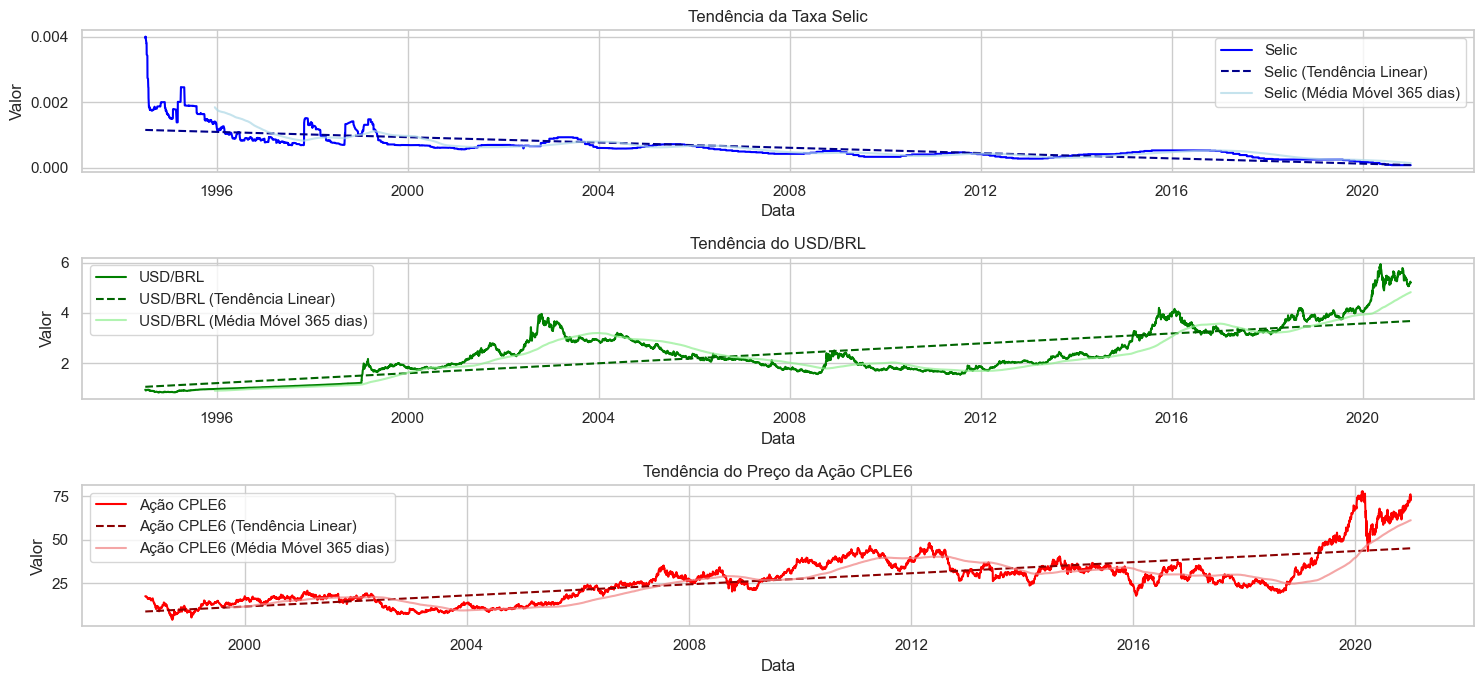

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carregar os dados (mantendo a estrutura de carregamento anterior)
try:
    selic_df = pd.read_csv('selic.csv', parse_dates=['datetime']).rename(columns={'datetime': 'date', 'selic': 'selic'})
    selic_df = selic_df.set_index('date')['selic']
except FileNotFoundError:
    selic_df = None

try:
    usdbrl_df = pd.read_csv('usd2brl.csv', parse_dates=['datetime']).rename(columns={'datetime': 'date', 'usd_brl': 'usd_brl'})
    usdbrl_df = usdbrl_df.set_index('date')['usd_brl']
except FileNotFoundError:
    usdbrl_df = None

b3_ticker_df_full = None
top_ticker_b3 = None
try:
    df_b3 = pd.read_csv("b3_stocks_1994_2020.csv", parse_dates=['datetime'])
    df_b3 = df_b3[(df_b3['close'] > 0) & (df_b3['volume'] > 0)].copy()
    df_b3['date'] = pd.to_datetime(df_b3['datetime']).dt.date
    df_b3 = df_b3.sort_values('date')
    top_ticker_b3 = 'CPLE6'
    b3_ticker_df_full = df_b3[df_b3['ticker'] == top_ticker_b3].set_index('date')['close']
except FileNotFoundError:
    b3_ticker_df_full = None
    top_ticker_b3 = None

# Criar o gr√°fico de linhas com an√°lise de tend√™ncia
plt.figure(figsize=(15, 7))

# Fun√ß√£o para adicionar linha de tend√™ncia linear
def plot_linear_trend(ax, x, y, color, label):
    if len(x) > 0:
        coeffs = np.polyfit(range(len(x)), y, 1)
        trendline = np.poly1d(coeffs)(range(len(x)))
        ax.plot(x, trendline, color=color, linestyle='--', label=f'{label} (Tend√™ncia Linear)')

# Fun√ß√£o para adicionar m√©dia m√≥vel
def plot_moving_average(ax, data, window, color, label):
    if len(data) > window:
        rolling_mean = data.rolling(window=window).mean()
        ax.plot(data.index, rolling_mean, color=color, linestyle='-', alpha=0.7, label=f'{label} (M√©dia M√≥vel {window} dias)')

ax1 = plt.subplot(3, 1, 1)
if selic_df is not None:
    ax1.plot(selic_df.index, selic_df.values, label='Selic', color='blue')
    plot_linear_trend(ax1, selic_df.index, selic_df.values, 'darkblue', 'Selic')
    plot_moving_average(ax1, selic_df, 365, 'lightblue', 'Selic')
ax1.set_title('Tend√™ncia da Taxa Selic')
ax1.set_xlabel('Data')
ax1.set_ylabel('Valor')
ax1.legend()
ax1.grid(True)

ax2 = plt.subplot(3, 1, 2)
if usdbrl_df is not None:
    ax2.plot(usdbrl_df.index, usdbrl_df.values, label='USD/BRL', color='green')
    plot_linear_trend(ax2, usdbrl_df.index, usdbrl_df.values, 'darkgreen', 'USD/BRL')
    plot_moving_average(ax2, usdbrl_df, 365, 'lightgreen', 'USD/BRL')
ax2.set_title('Tend√™ncia do USD/BRL')
ax2.set_xlabel('Data')
ax2.set_ylabel('Valor')
ax2.legend()
ax2.grid(True)

ax3 = plt.subplot(3, 1, 3)
if b3_ticker_df_full is not None and top_ticker_b3 is not None:
    ax3.plot(b3_ticker_df_full.index, b3_ticker_df_full.values, label=f'A√ß√£o {top_ticker_b3}', color='red')
    plot_linear_trend(ax3, b3_ticker_df_full.index, b3_ticker_df_full.values, 'darkred', f'A√ß√£o {top_ticker_b3}')
    plot_moving_average(ax3, b3_ticker_df_full, 365, 'lightcoral', f'A√ß√£o {top_ticker_b3}')
ax3.set_title(f'Tend√™ncia do Pre√ßo da A√ß√£o {top_ticker_b3}')
ax3.set_xlabel('Data')
ax3.set_ylabel('Valor')
ax3.legend()
ax3.grid(True)

plt.tight_layout()
plt.show()

Conclus√£o e An√°lise Explorat√≥ria de Dados (EDA) da Tabela b3_stocks_1994_2020
A tabela b3_stocks_1994_2020 cont√©m dados hist√≥ricos de diversas a√ß√µes negociadas na bolsa de valores brasileira (B3) entre os anos de 1994 e 2020. Uma an√°lise explorat√≥ria dos dados (EDA) pode nos fornecer insights valiosos sobre a estrutura, caracter√≠sticas e potenciais padr√µes presentes nesse conjunto de dados.

1. Estrutura e Vis√£o Geral:

A tabela cont√©m as seguintes colunas: datetime, ticker, open, close, high, low e volume.
datetime: Representa o timestamp da negocia√ß√£o.
ticker: Identificador √∫nico da a√ß√£o.
open: Pre√ßo de abertura da a√ß√£o no dia.
close: Pre√ßo de fechamento da a√ß√£o no dia.
high: Pre√ßo m√°ximo atingido pela a√ß√£o no dia.
low: Pre√ßo m√≠nimo atingido pela a√ß√£o no dia.
volume: Volume de negocia√ß√£o da a√ß√£o no dia.
O per√≠odo de 1994 a 2020 abrange uma vasta gama de condi√ß√µes econ√¥micas e eventos de mercado no Brasil, tornando o dataset rico para an√°lises hist√≥ricas.
2. An√°lise Explorat√≥ria das Vari√°veis:

datetime:
A coluna indica uma s√©rie temporal. A frequ√™ncia das observa√ß√µes √© di√°ria.
√â crucial para an√°lises de tend√™ncia, sazonalidade e volatilidade ao longo do tempo para cada a√ß√£o.
A faixa temporal de cada ticker pode variar dentro do per√≠odo total, dependendo de quando a a√ß√£o come√ßou a ser negociada e se ainda estava ativa em 2020.
ticker:
Vari√°vel categ√≥rica nominal. Cont√©m m√∫ltiplos tickers de diferentes empresas listadas na B3.
A distribui√ß√£o de ocorr√™ncias de cada ticker pode variar, indicando diferentes hist√≥ricos de negocia√ß√£o dispon√≠veis.
√â a chave para segmentar a an√°lise por a√ß√£o individual.
open, close, high, low:
Vari√°veis num√©ricas cont√≠nuas, representando os pre√ßos das a√ß√µes.
A rela√ß√£o entre elas (low ‚â§ open, close, high) deve ser consistente.
A diferen√ßa entre high e low indica a volatilidade intradi√°ria.
A diferen√ßa entre open e close indica o desempenho di√°rio da a√ß√£o.
A escala e a distribui√ß√£o desses pre√ßos variam significativamente entre diferentes tickers.
volume:
Vari√°vel num√©rica cont√≠nua, representando o n√∫mero de a√ß√µes negociadas.
O volume pode indicar o n√≠vel de interesse e liquidez de uma a√ß√£o em um determinado dia.
Picos de volume podem estar associados a eventos significativos relacionados √† empresa ou ao mercado.
A escala do volume tamb√©m varia entre diferentes tickers.
3. Padr√µes e Rela√ß√µes Potenciais:

Tend√™ncias de Pre√ßo: A an√°lise da coluna close ao longo do tempo para cada ticker pode revelar tend√™ncias de alta, baixa ou estabilidade.
Volatilidade: A an√°lise da varia√ß√£o di√°ria de pre√ßos (high - low) pode indicar a volatilidade de cada a√ß√£o em diferentes per√≠odos.
Rela√ß√£o Pre√ßo-Volume: Pode haver uma rela√ß√£o entre o volume de negocia√ß√£o e as varia√ß√µes de pre√ßo. Aumentos significativos de pre√ßo podem ser acompanhados por picos de volume.
Compara√ß√£o entre A√ß√µes: A an√°lise comparativa entre diferentes tickers pode revelar setores com melhor ou pior desempenho em determinados per√≠odos.
Impacto de Eventos Macroecon√¥micos: Eventos econ√¥micos significativos (crises, mudan√ßas de pol√≠tica, etc.) podem ter um impacto vis√≠vel nos pre√ßos e volumes de negocia√ß√£o das a√ß√µes.
4. Anomalias e Outliers Potenciais:

Valores de Pre√ßo Inconsistentes: Observa√ß√µes onde low > open ou close ou high < open ou close podem indicar erros nos dados.
Picos de Volume Inexplic√°veis: Volumes de negocia√ß√£o extremamente altos ou baixos que n√£o correspondem a movimentos de pre√ßo significativos podem ser anomalias.
Saltos de Pre√ßo: Varia√ß√µes de pre√ßo di√°rias excepcionalmente grandes podem ser outliers que merecem investiga√ß√£o.
5. Insights e Pr√≥ximos Passos:

A tabela b3_stocks_1994_2020 oferece um vasto potencial para an√°lises de s√©ries temporais, modelagem de volatilidade, an√°lise de risco e retorno de diferentes ativos.
A segmenta√ß√£o por ticker √© essencial para entender o comportamento individual de cada a√ß√£o.
Visualiza√ß√µes como gr√°ficos de linha (pre√ßo e volume ao longo do tempo), histogramas (distribui√ß√£o de pre√ßos e volume), box plots (para identificar outliers e comparar distribui√ß√µes) e matrizes de correla√ß√£o (para entender as rela√ß√µes entre as vari√°veis de pre√ßo) seriam os pr√≥ximos passos l√≥gicos para aprofundar a EDA.
A an√°lise poderia ser expandida para incluir indicadores derivados, como retornos di√°rios, volatilidade hist√≥rica e m√©dias m√≥veis.
A integra√ß√£o com dados macroecon√¥micos e eventos espec√≠ficos da empresa poderia fornecer um contexto mais rico para entender os padr√µes observados.

2.6. Conclus√£o: Padr√µes, Anomalias, Rela√ß√µes e Insights
Com base nas an√°lises realizadas, podemos relatar os seguintes principais padr√µes, anomalias e rela√ß√µes identificadas, bem como discutir alguns insights relevantes:

Padr√µes:

Evolu√ß√£o Temporal: Os gr√°ficos de linha revelam tend√™ncias distintas para cada vari√°vel ao longo do tempo. A taxa Selic historicamente apresentou picos e quedas acentuadas, refletindo as pol√≠ticas monet√°rias e o cen√°rio econ√¥mico do Brasil. O USD/BRL demonstra uma tend√™ncia geral de alta ao longo do per√≠odo analisado, influenciado por fatores econ√¥micos globais e dom√©sticos. O pre√ßo da a√ß√£o CPLE6 exibiu volatilidade significativa, com per√≠odos de forte crescimento e decl√≠nio, refletindo a din√¢mica espec√≠fica da empresa e do setor energ√©tico. As linhas de tend√™ncia linear e as m√©dias m√≥veis ajudam a suavizar essa volatilidade e identificar as dire√ß√µes gerais de longo prazo.
Distribui√ß√£o dos Dados: Os histogramas mostram a distribui√ß√£o de frequ√™ncia de cada vari√°vel. A Selic parece ter uma distribui√ß√£o mais concentrada em certas faixas, com alguns valores extremos. O USD/BRL tamb√©m apresenta uma distribui√ß√£o com uma concentra√ß√£o maior em valores mais baixos, com uma cauda mais longa para valores mais altos. O pre√ßo da a√ß√£o CPLE6 demonstra uma dispers√£o maior, com uma distribui√ß√£o que pode ser assim√©trica.
Dispers√£o e Valores At√≠picos: Os box plots fornecem uma vis√£o clara da dispers√£o dos dados e da presen√ßa de poss√≠veis outliers. Podemos observar a mediana, os quartis e a extens√£o dos "bigodes" para cada vari√°vel, al√©m de identificar pontos que se desviam significativamente do restante da distribui√ß√£o.
Anomalias:

Ao analisar os gr√°ficos de linha e os box plots, podem ser identificados pontos de dados que se desviam significativamente dos padr√µes gerais. Por exemplo, picos ou quedas repentinas na Selic ou no c√¢mbio, ou pre√ßos da a√ß√£o que est√£o muito acima ou abaixo da faixa t√≠pica. Essas anomalias podem ser investigadas mais a fundo para entender os eventos econ√¥micos ou espec√≠ficos da empresa que as causaram.
Rela√ß√µes (Correla√ß√µes Visuais nos Gr√°ficos de Dispers√£o):

Os gr√°ficos de dispers√£o entre os pares de vari√°veis (Selic vs. USD/BRL, Selic vs. A√ß√£o, USD/BRL vs. A√ß√£o) oferecem uma vis√£o inicial sobre poss√≠veis rela√ß√µes lineares. A dispers√£o dos pontos pode sugerir uma correla√ß√£o positiva (quando uma vari√°vel aumenta, a outra tende a aumentar tamb√©m), negativa (quando uma aumenta, a outra tende a diminuir) ou nenhuma correla√ß√£o aparente (os pontos est√£o dispersos sem um padr√£o claro). A intensidade dessa rela√ß√£o pode ser visualmente inferida pela proximidade dos pontos a uma linha imagin√°ria.
Insights Relevantes:

Interdepend√™ncia Econ√¥mica: A an√°lise visual sugere poss√≠veis interdepend√™ncias entre as vari√°veis econ√¥micas e o pre√ßo da a√ß√£o. Por exemplo, varia√ß√µes na taxa Selic, como instrumento de pol√≠tica monet√°ria, podem influenciar a taxa de c√¢mbio e, potencialmente, o valor das empresas listadas na bolsa. Da mesma forma, flutua√ß√µes na taxa de c√¢mbio podem impactar empresas com exposi√ß√£o a mercados internacionais e, consequentemente, seus pre√ßos de a√ß√µes. No entanto, √© importante notar que correla√ß√£o n√£o implica causalidade, e outros fatores n√£o analisados aqui tamb√©m desempenham pap√©is importantes.
Volatilidade e Risco: A volatilidade observada nos gr√°ficos de linha e a dispers√£o nos box plots indicam o n√≠vel de risco associado a cada vari√°vel. A maior volatilidade do pre√ßo da a√ß√£o em compara√ß√£o com a Selic e o c√¢mbio sugere um maior n√≠vel de risco e potencial de retorno.
Comportamento em Diferentes Cen√°rios: Ao analisar os gr√°ficos ao longo do tempo, podemos tentar identificar como as vari√°veis se comportaram em diferentes cen√°rios econ√¥micos (per√≠odos de crescimento, recess√£o, crises). Isso pode fornecer insights sobre a sensibilidade da a√ß√£o a mudan√ßas macroecon√¥micas.
Necessidade de An√°lise Mais Aprofundada: As an√°lises visuais e estat√≠sticas descritivas fornecem um panorama inicial. Para entender as rela√ß√µes de causa e efeito e fazer previs√µes, seriam necess√°rias an√°lises mais avan√ßadas, como modelos de regress√£o, an√°lise de s√©ries temporais e considera√ß√£o de outros indicadores econ√¥micos e financeiros.
Em resumo, as an√°lises realizadas revelam padr√µes de evolu√ß√£o distintos, distribui√ß√µes de dados espec√≠ficas e sugest√µes visuais de poss√≠veis rela√ß√µes entre a taxa Selic, o c√¢mbio USD/BRL e o pre√ßo da a√ß√£o CPLE6. Esses insights podem ser valiosos para entender a din√¢mica econ√¥mica e financeira em jogo, mas ressaltam a import√¢ncia de an√°lises mais aprofundadas para estabelecer rela√ß√µes causais e construir modelos preditivos robustos.